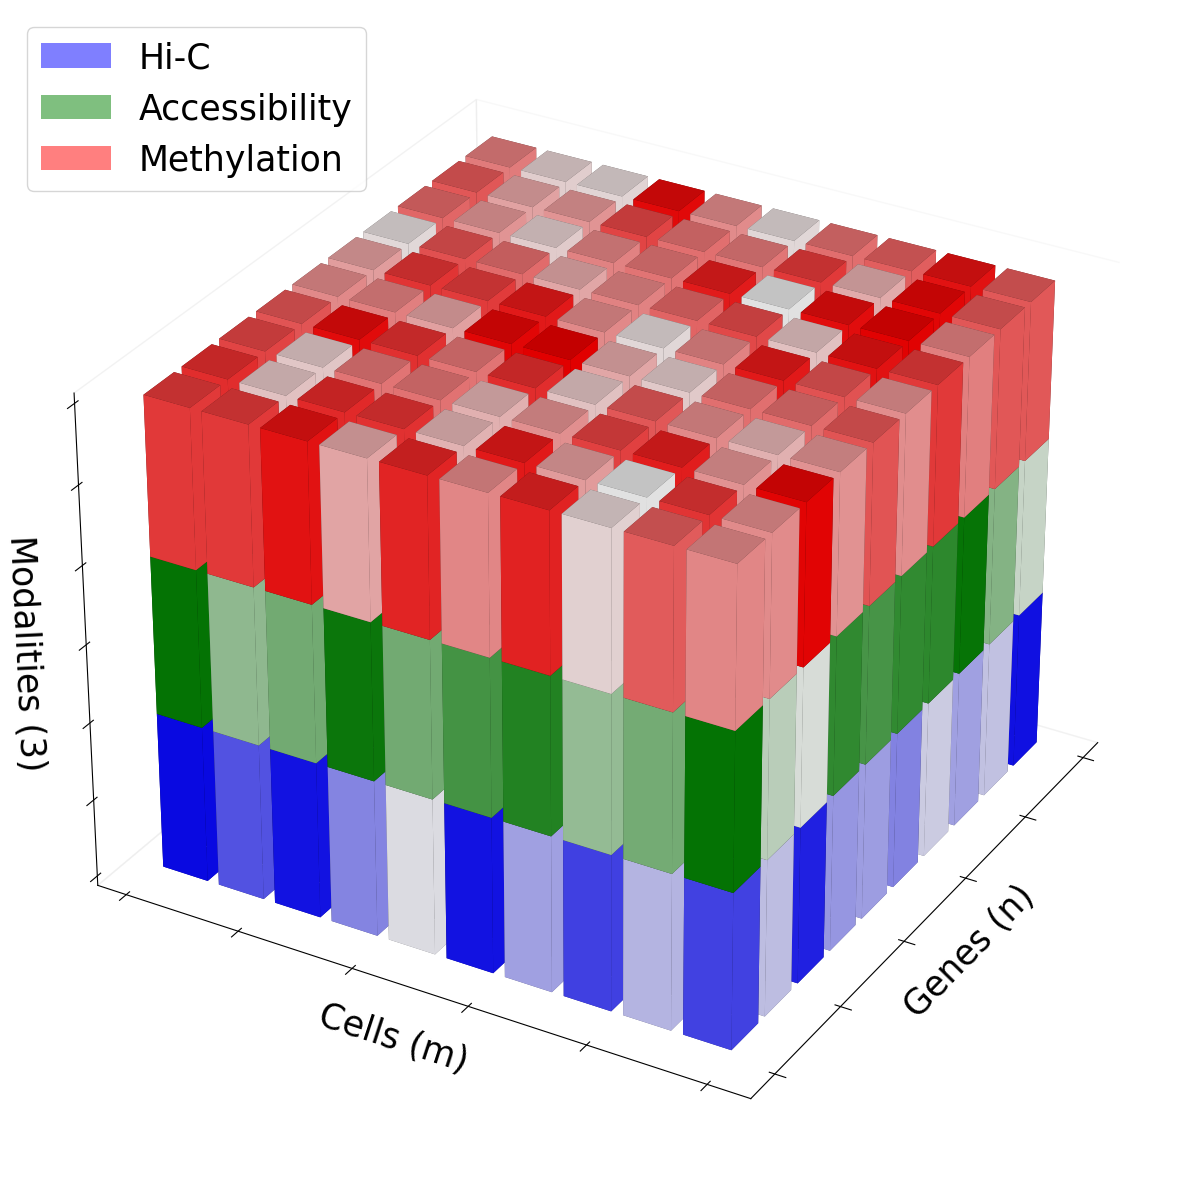

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch

# Set up the figure and the 3D axis
fig = plt.figure(figsize=(15, 40))
ax = fig.add_subplot(111, projection='3d')

# Set up the grid in the 3D axis
xpos, ypos = np.meshgrid(np.arange(0, 10, 1), np.arange(0, 10, 1))
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

# Set up the dimensions of the bars
dx = dy = 0.8 * np.ones_like(zpos)
dz = np.ones_like(zpos)

# Define custom colormaps
red_cmap = LinearSegmentedColormap.from_list("red", ["white", "red"])
green_cmap = LinearSegmentedColormap.from_list("green", ["white", "green"])
blue_cmap = LinearSegmentedColormap.from_list("blue", ["white", "blue"])
cmaps = [blue_cmap, green_cmap, red_cmap]

# Set up the colors and layers
for i in range(3):  # 3 layers, each with a different color map
    # Generate colors for each layer based on the colormap
    layer_colors = cmaps[i](np.linspace(0, 1, 100))[np.random.randint(0, 100, 100)]
    
    # Each layer is offset in the z direction by i
    ax.bar3d(xpos, ypos, dz*i, dx, dy, dz, color=layer_colors)

# Customize the labels and the view angle for better visualization
ax.set_xlabel('Genes (n)', fontsize=25)
ax.set_ylabel('Cells (m)', fontsize=25)
ax.set_zlabel('Modalities (3)', fontsize=25)
ax.view_init(30, 210)  # Elevation, Azimuth

# Remove the numbers on the axes
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# Customize background and grid
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)

# Create a custom legend with corrected order and colors
legend_names = ['Hi-C', 'Accessibility', 'Methylation']  # Correct order from bottom to top in the plot
legend_elements = [
    Patch(facecolor=cmaps[0](0.5), label=legend_names[0]),  # Blue for Hi-C
    Patch(facecolor=cmaps[1](0.5), label=legend_names[1]),  # Green for Accessibility
    Patch(facecolor=cmaps[2](0.5), label=legend_names[2])   # Red for Methylation
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=25)  # Apply the correct legend

# Show the plot
plt.show()
